Please see the copy1 for Bacteria and Copy2 for ITS

In [1]:
import sys
sys.path.append('../../../Code')
import loadData 
import RunML
import RunML_continue
import FS
import metric



2025-01-27 01:49:15.121819: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-27 01:49:15.124103: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-27 01:49:15.184827: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-27 01:49:15.197898: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737960555.271360 3879584 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737960555.31

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pickle
import matplotlib.pyplot as plt
import glob
import os

In [3]:
PMIdata_path = '../data/count_table/'

## No env model
16s (OTU/phylum/class/order) - no env

ITS (OTU/phylum/class/order) - no env

16s+ITS (OTU/phylum/class/order) - no env (only use this data when calculating H)
bact.ITS.n.class.env

### Data preprocess


In [4]:
bact_ITS_noenv_files = glob.glob(PMIdata_path + 'bact.ITS.n.*.noenv.csv')


In [5]:
bact_ITS_noenv_files

['../data/count_table/bact.ITS.n.otu.noenv.csv',
 '../data/count_table/bact.ITS.n.class.noenv.csv',
 '../data/count_table/bact.ITS.n.order.noenv.csv',
 '../data/count_table/bact.ITS.n.phylum.noenv.csv']

In [6]:
# Read each CSV file into a list of dataframes
bact_ITS_noenv_df_list = [pd.read_csv(file) for file in bact_ITS_noenv_files]


In [7]:
# target variable
y = bact_ITS_noenv_df_list[3].iloc[:, 0].values 

# Define the threshold
y_threshold = 2500

# Categorize the series based on the threshold
y = np.where(y > y_threshold, 'LONG', 'SHORT')

print(y)

print(list(y).count('LONG'))
print(list(y).count('SHORT'))

['SHORT' 'SHORT' 'SHORT' 'LONG' 'LONG' 'SHORT' 'SHORT' 'SHORT' 'SHORT'
 'SHORT' 'SHORT' 'SHORT' 'LONG' 'LONG' 'SHORT' 'SHORT' 'LONG' 'LONG'
 'LONG' 'SHORT' 'LONG' 'LONG' 'SHORT' 'SHORT' 'LONG' 'LONG' 'SHORT'
 'SHORT' 'LONG' 'LONG' 'SHORT' 'SHORT' 'LONG' 'LONG' 'SHORT' 'SHORT'
 'LONG' 'LONG' 'SHORT' 'SHORT' 'LONG' 'LONG' 'SHORT' 'SHORT' 'LONG' 'LONG'
 'SHORT' 'SHORT' 'LONG' 'LONG' 'SHORT' 'SHORT' 'LONG' 'LONG' 'SHORT'
 'SHORT' 'LONG' 'LONG' 'SHORT' 'SHORT' 'LONG' 'LONG' 'SHORT' 'SHORT'
 'LONG' 'LONG' 'SHORT' 'SHORT' 'SHORT' 'SHORT' 'SHORT' 'SHORT' 'LONG'
 'LONG' 'SHORT' 'SHORT' 'LONG' 'LONG']
35
43


In [8]:
bact_ITS_noenv_df_list[3]

,ADH_10_actual,Proteobacteria,Verrucomicrobia,Acidobacteria,Actinobacteria,Firmicutes,Bacteroidetes,Chloroflexi,Rokubacteria,Entotheonellaeota,...,p__Mucoromycota,p__Glomeromycota,p__Monoblepharomycota,p__unclassified_Fungi,p__Zoopagomycota,p__Kickxellomycota,p__Olpidiomycota,p__Aphelidiomycota,p__Blastocladiomycota,p__Basidiobolomycota
0,0.00000,2405.899397,957.553453,1988.986693,2524.409168,92.418396,311.448621,526.359155,123.316076,99.009901,...,86.785175,35.007547,0.209626,127.662251,0.000000,11.739058,0.0,1.886634,4.611773,0.000000
1,1484.14700,3209.276660,757.215776,1727.647573,1840.003679,226.398320,680.881068,465.059244,117.874278,67.904168,...,73.063061,27.939985,0.977899,144.030622,0.000000,7.264396,0.0,4.610098,15.366992,0.000000
2,1989.56009,3829.070365,412.942989,821.982537,1300.667694,389.111454,2416.230098,276.938880,48.073960,41.088855,...,47.127278,1.701346,1.701346,71.966926,0.000000,4.593634,0.0,4.933903,0.510404,0.000000
3,2973.68000,3194.403374,419.280034,848.987596,1688.948376,1069.522046,1868.083981,287.613030,65.055328,42.488288,...,101.508764,6.989128,0.000000,64.122476,0.000000,18.193921,0.0,1.996894,0.000000,3.106279
4,4027.69203,3694.823154,475.772750,833.851140,1209.230357,465.538458,2514.224448,230.271574,60.065548,51.049624,...,493.950429,9.984729,0.587337,96.323270,0.000000,14.096088,0.0,1.468343,1.468343,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,4447.32241,2456.386357,702.629879,1096.355563,2612.831828,1416.120207,209.098033,519.102019,161.669485,29.144499,...,354.041916,2.352438,0.106929,18.712575,0.855432,10.585971,0.0,0.534645,0.000000,0.000000
74,0.00000,2919.908680,1004.519405,1906.070913,954.200252,28.421004,1003.432263,630.853096,87.437295,19.413254,...,34.921758,286.446822,7.956856,438.069136,0.442048,0.884095,0.0,0.000000,0.000000,0.000000
75,1477.74800,4411.744255,735.145847,1127.142509,1262.559538,178.006467,886.381810,434.238431,128.985155,45.718458,...,45.856084,11.620207,0.624742,11.620207,2.623918,0.749691,0.0,0.249897,0.124948,0.000000
76,2554.43400,2821.384741,962.492330,1377.965842,1773.368787,586.137247,543.055840,570.541010,179.740233,65.964410,...,28.655093,12.131353,2.509935,24.262707,1.464129,1.464129,0.0,0.209161,0.000000,0.000000


In [9]:
# delete the response variable
# rearrange the sequence 
for df in bact_ITS_noenv_df_list:
    print(df.shape)
    
order = [0, 2, 1,3]  # Rearrange to ['OTU', 'order', 'class', 'phylum']
bact_ITS_noenv_df_list = [bact_ITS_noenv_df_list[i] for i in order]
taxlabels = ['OTU', 'order', 'class', 'phylum']

col_names_4taxa= []
for i in range(len(bact_ITS_noenv_df_list)):
    bact_ITS_noenv_df_list[i] = bact_ITS_noenv_df_list[i].drop(bact_ITS_noenv_df_list[i].columns[0], axis=1)
    cols_name = bact_ITS_noenv_df_list[i].columns
    col_names_4taxa.append(cols_name)

for df in bact_ITS_noenv_df_list:
    print(df.shape)

(78, 7415)
(78, 178)
(78, 412)
(78, 52)
(78, 7414)
(78, 411)
(78, 177)
(78, 51)


##### 1. calculate H statistics for OTU/phylum/class/order (both 16s and ITS)

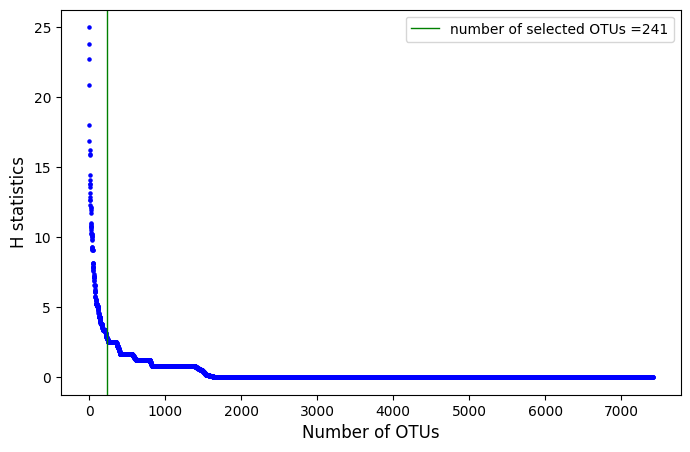

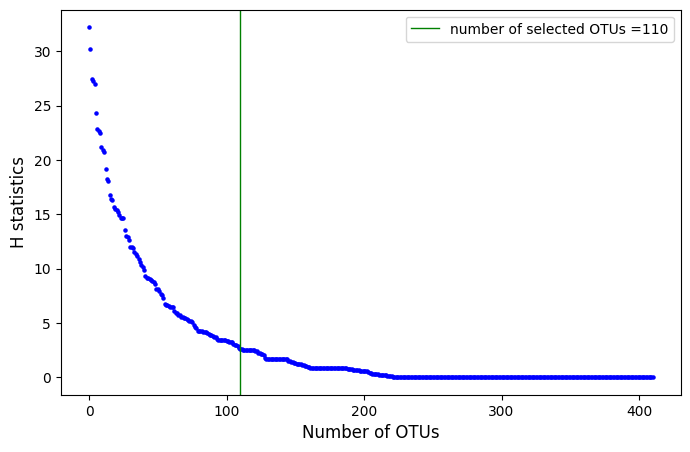

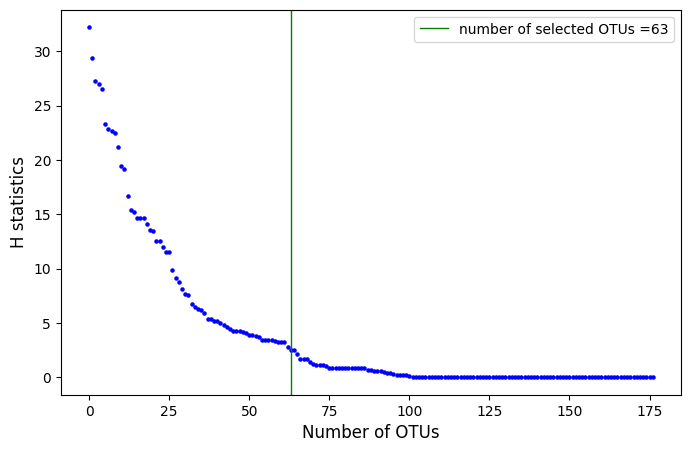

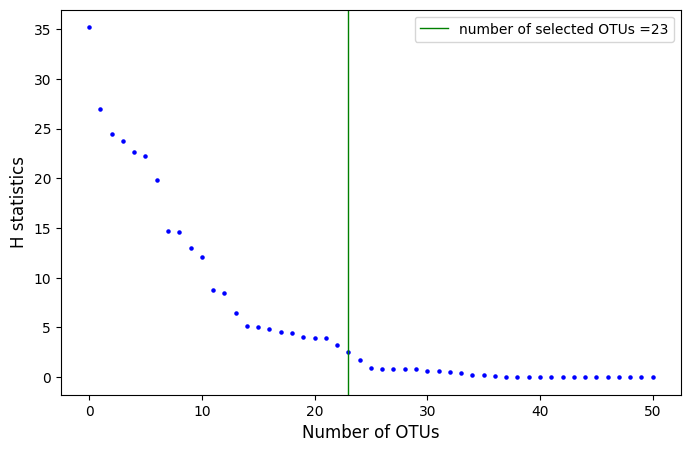

In [10]:
data_4taxa = []
weights_4taxa = []
selectedOTU_index_4tax = []
X_FS_4taxa = []
selectedASVs_4taxa = []

for df in bact_ITS_noenv_df_list:
    select_result = FS.SelectMicro_fun(df,y,threshold=0.001)
    data_4taxa.append(select_result['relative_abundance_data'])
    weights_4taxa.append(select_result['H_score'])
    selectedOTU_index_4tax.append(select_result['selected_indices'])
    X_FS_4taxa.append(select_result['selected_data'])
    selectedASVs_4taxa.append(select_result['selected_columnames'])

In [11]:
for i in range(4):
    print(f"Selected features in {taxlabels[i]} : {selectedASVs_4taxa[i]}")

Selected features in OTU : Index(['Otu00009', 'ITS00002', 'ITS00001', 'Otu00008', 'ITS00006', 'ITS00050',
       'Otu00003', 'Otu00174', 'Otu00150', 'Otu00007',
       ...
       'Otu00116', 'Otu00359', 'ITS00115', 'ITS00159', 'ITS00213', 'Otu00067',
       'Otu00146', 'ITS00025', 'Otu00165', 'Otu00070'],
      dtype='object', length=241)
Selected features in order : Index(['Clostridiales', 'Lactobacillales', 'o__Pleosporales',
       'o__Saccharomycetales', 'o__unclassified_Fungi', 'Bacteroidales',
       'o__Rhizophydiales', 'k__Fungi_unclassified', 'Selenomonadales',
       'p__Ascomycota_unclassified',
       ...
       'SBR1031', 'Pirellulales', 'o__Pezizales', 'Dongiales',
       'o__Mortierellales', 'Gammaproteobacteria_Incertae_Sedis',
       'Betaproteobacteriales', 'Parcubacteria_unclassified',
       'o__Ophiostomatales', 'c__Microbotryomycetes_unclassified'],
      dtype='object', length=110)
Selected features in class : Index(['Clostridia', 'c__Dothideomycetes', 'c__Saccha

In [12]:
#plot the h statistics and cutoff descendingly
#for i in range(len(weights_4taxa)):
    #FS.plotWeightedIndex(weights_4taxa[i],threshold=eps_4tax[i])

#### 4. Model
Prepare 4 datasets: full dataset, our selected dataset, Lasso selected  dataset(based on the target variable), randomly selected data (selected the same numer of variables as in our method)

Use random forest and SVM as classifier, and will build both models for each response variable.

For Lasso, the dataset will be determined by the response variable, so the lasso subset is different for the models for different response variables.

For random selection, the  process will repeat iter=30 times to  find the mean accuracy and AUC

SMOTE  is used (the data is not balanced, as we can see the performance is really bad especially for SVM model when not using SMOTE)

In [13]:
iter =30
cls = ["RF","SVM", "CatBoost","NB"]

In [14]:
targetLabel=y

In [15]:
data_subset_4taxa = []

X_lasso_4taxa = []
xind_lasso_4taxa = []

X_FS_lasso_4taxa = []
xind_FS_lasso_4taxa = []


X_lasso_FS_4taxa = []
xind_lasso_FS_4taxa = []


for i, data  in enumerate(data_4taxa):

    X_FS = X_FS_4taxa[i]
    
    X_lasso_ft,xlabel_lasso_ft  = RunML_continue.LassoFS_CV(data,targetLabel)
    X_lasso_4taxa.append(X_lasso_ft)
    xind_lasso_4taxa.append(xlabel_lasso_ft)

    X_FS_lasso_ft,xlabel_FS_lasso_ft0  = RunML_continue.LassoFS_CV(X_FS,targetLabel)
    xlabel_FS_lasso_ft = selectedOTU_index_4tax[i][xlabel_FS_lasso_ft0]
    X_FS_lasso_4taxa.append(X_FS_lasso_ft)
    xind_FS_lasso_4taxa.append(xlabel_FS_lasso_ft)


    xlabel_lasso_FS = np.intersect1d(xlabel_lasso_ft, selectedOTU_index_4tax[i])
    X_lasso_FS = data[:,xlabel_lasso_FS]
    X_lasso_FS_4taxa.append(X_lasso_FS)
    xind_lasso_FS_4taxa.append(xlabel_lasso_FS)

    
    data_subset = {"AllFeatures":data, 
               "SelectMicro": X_FS,
               "Lasso_finetune":X_lasso_ft,
               "FS_Lassofinetune":X_FS_lasso_ft,
                   "Lassofinetune_FS":X_lasso_FS
               
              }
    data_subset_4taxa.append(data_subset)

Best alpha: 0.1
Best alpha: 0.1
Best alpha: 0.05
Best alpha: 0.05
Best alpha: 0.05
Best alpha: 0.05
Best alpha: 0.05
Best alpha: 0.05


In [16]:
for i, dataset  in enumerate(data_subset_4taxa):
    data_subset = dataset
    
    for datatype, subset in data_subset.items():
        print(np.shape(subset))

(78, 7414)
(78, 241)
(78, 9)
(78, 9)
(78, 9)
(78, 411)
(78, 110)
(78, 23)
(78, 20)
(78, 20)
(78, 177)
(78, 63)
(78, 19)
(78, 18)
(78, 17)
(78, 51)
(78, 23)
(78, 8)
(78, 8)
(78, 8)


In [17]:
for i in range(4):
    print(taxlabels[i])
    print(xind_FS_lasso_4taxa[i])
    print(xind_lasso_FS_4taxa[i])

OTU
[   8 5196    7 5200  171   35  133   74 5202]
[   7    8   35   74  133  171 5196 5200 5202]
order
[  2 293 264 312  43  19 321   6 286 111 296 288 294 316 301 300  46 292
 290 270]
[  2   6   7  19  42  43  46 111 264 270 271 286 290 292 293 294 300 312
 316 321]
class
[  1 126 111 136   7  12 140 125  48 123 139 132  22  68 113 129 122 116]
[  1   7  12  22  48 111 113 116 117 123 125 126 129 132 136 139 140]
phylum
[ 4 44 40  2 39  9 10 37]
[ 2  4  9 10 37 39 40 44]


In [18]:
#with open('../data/data_subset_4taxa_paperthreshold.pkl', 'wb') as file:
#    pickle.dump(data_subset_4taxa, file)

In [19]:
dict_cm_list = []

In [20]:
for i , dataset  in enumerate(data_subset_4taxa):
    print(f"Analysis for {taxlabels[i]}")
    dict_cm = RunML_continue.runClassifier_FScompare(data_subsets= dataset,y= targetLabel,classifiers=cls)
    print(metric.metric_sum(dict_cm))
    dict_cm_list.append(dict_cm)

Analysis for OTU
Classes: ['LONG' 'SHORT']
[0.8888888888888888, 0.9841269841269842, 0.611111111111111, 1.0, 0.8125000000000001]
[0.9841269841269842, 0.9682539682539683, 0.6825396825396826, 0.9285714285714286, 0.9642857142857143]


TBB Warning: The number of workers is currently limited to 0. The request for 47 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.



[0.9523809523809523, 0.9841269841269842, 0.6507936507936508, 1.0, 0.8571428571428572]
[0.6428571428571428, 0.873015873015873, 0.7063492063492064, 0.8660714285714286, 0.8660714285714286]
[0.9841269841269841, 1.0, 0.7380952380952381, 1.0, 0.8214285714285714]
[0.9682539682539684, 1.0, 0.6984126984126985, 0.9821428571428572, 0.9821428571428572]
[0.9523809523809523, 0.9682539682539683, 0.7142857142857143, 1.0, 0.8571428571428571]
[0.8571428571428572, 1.0, 0.7063492063492064, 1.0, 0.8571428571428571]
[1.0, 0.9841269841269841, 0.8015873015873016, 1.0, 0.875]
[0.9523809523809523, 0.9523809523809524, 0.6984126984126984, 0.9821428571428572, 0.875]
[0.9682539682539684, 1.0, 0.7619047619047619, 1.0, 0.8928571428571429]
[0.873015873015873, 1.0, 0.9206349206349207, 0.9017857142857143, 0.9285714285714286]
[1.0, 0.9682539682539683, 0.7777777777777778, 1.0, 0.875]
[0.9523809523809523, 0.9523809523809524, 0.6984126984126984, 0.9821428571428572, 0.875]
[1.0, 0.9682539682539684, 0.746031746031746, 1.0, 0.

In [21]:
dict_cm2_list = []
for i , dataset  in enumerate(data_subset_4taxa):
    print(f"Analysis for {taxlabels[i]}")
    dict_cm = RunML_continue.runClassifier_FScompare(data_subsets= dataset,y= targetLabel,classifiers=['xgboost'])
    print(metric.metric_sum(dict_cm))
    dict_cm2_list.append(dict_cm)

Analysis for OTU
Classes: ['LONG' 'SHORT']
[0.9206349206349207, 1.0, 0.6666666666666666, 1.0, 0.8035714285714285]
[0.9365079365079365, 1.0, 0.6666666666666666, 1.0, 0.8214285714285714]
[0.9841269841269842, 0.9682539682539683, 0.746031746031746, 0.9642857142857143, 0.875]
[0.9841269841269842, 0.9682539682539683, 0.7301587301587301, 0.9642857142857143, 0.875]
[0.9841269841269842, 0.9682539682539683, 0.746031746031746, 0.9642857142857143, 0.875]
                  xgboost_Accuracy  xgboost_AUC  xgboost_Accuracy_std  \
AllFeatures           0.835833       0.878175          0.134205         
SelectMicro           0.835000       0.884921          0.133583         
Lasso_finetune        0.860833       0.907540          0.071181         
FS_Lassofinetune      0.860833       0.904365          0.071181         
Lassofinetune_FS      0.860833       0.907540          0.071181         

                  xgboost_AUC_std  xgboost_mcc  xgboost_F  
AllFeatures          0.127896       0.702632    0.8375

Analysis for OTU
Validation passed: Dimensions are correct.
Long= 35, short = 43
      OTU     presence_pos  presence_neg
0   Otu00009    0.028571      0.348837  
1   ITS00002    0.828571      0.279070  
2   ITS00001    0.800000      0.279070  
3   Otu00008    0.200000      0.000000  
4   ITS00006    0.228571      0.627907  
5   ITS00050    0.000000      0.046512  
6   Otu00003    0.085714      0.000000  
7   Otu00174    0.000000      0.000000  
8   Otu00150    0.000000      0.000000  
9   Otu00007    0.057143      0.302326  
10  Otu00012    0.000000      0.000000  
11  Otu00036    0.028571      0.000000  
12  Otu00049    0.000000      0.069767  
13  Otu00037    0.028571      0.000000  
14  Otu00040    0.000000      0.000000  


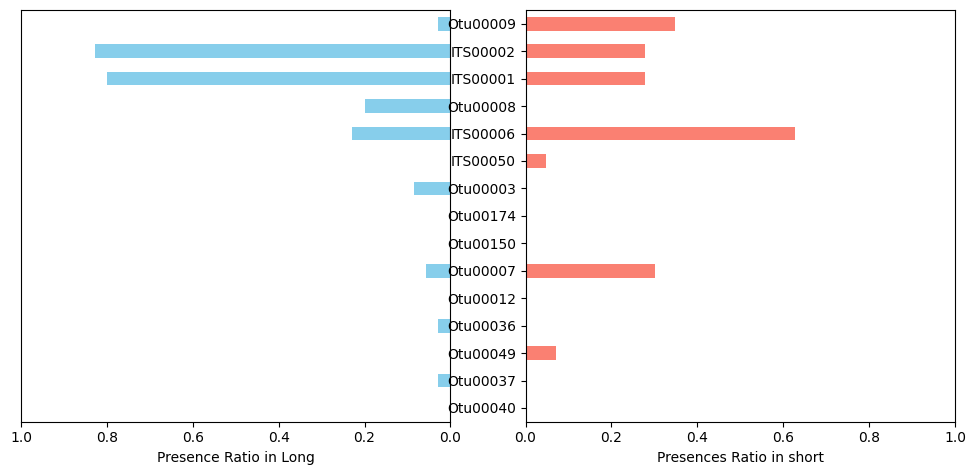

Validation passed: Dimensions are correct.
Long= 35, short = 43
     OTU     presence_pos  presence_neg
0  Otu00008    0.200000      0.000000  
1  Otu00009    0.028571      0.348837  
2  Otu00037    0.028571      0.000000  
3  Otu00077    0.000000      0.000000  
4  Otu00136    0.000000      0.000000  
5  Otu00174    0.000000      0.000000  
6  ITS00002    0.828571      0.279070  
7  ITS00006    0.228571      0.627907  
8  ITS00008    0.400000      0.116279  


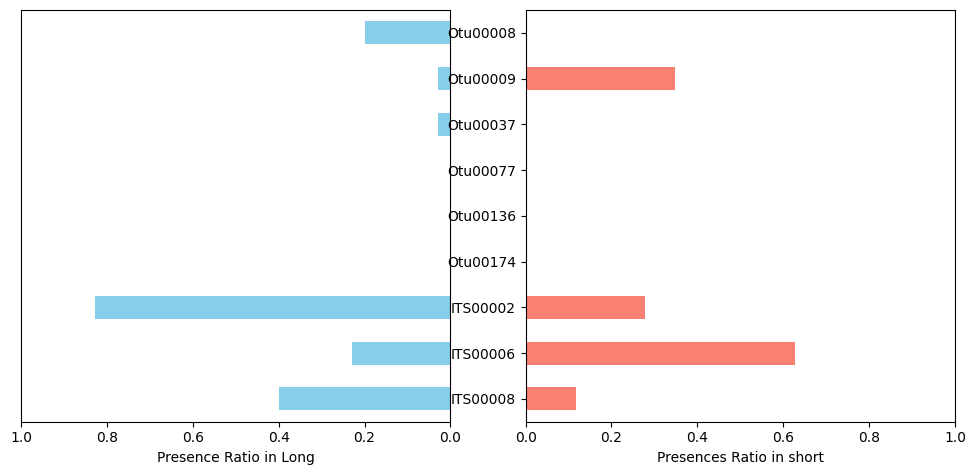

Validation passed: Dimensions are correct.
Long= 35, short = 43
     OTU     presence_pos  presence_neg
0  Otu00009    0.028571      0.348837  
1  ITS00002    0.828571      0.279070  
2  Otu00008    0.200000      0.000000  
3  ITS00006    0.228571      0.627907  
4  Otu00174    0.000000      0.000000  
5  Otu00037    0.028571      0.000000  
6  Otu00136    0.000000      0.000000  
7  Otu00077    0.000000      0.000000  
8  ITS00008    0.400000      0.116279  


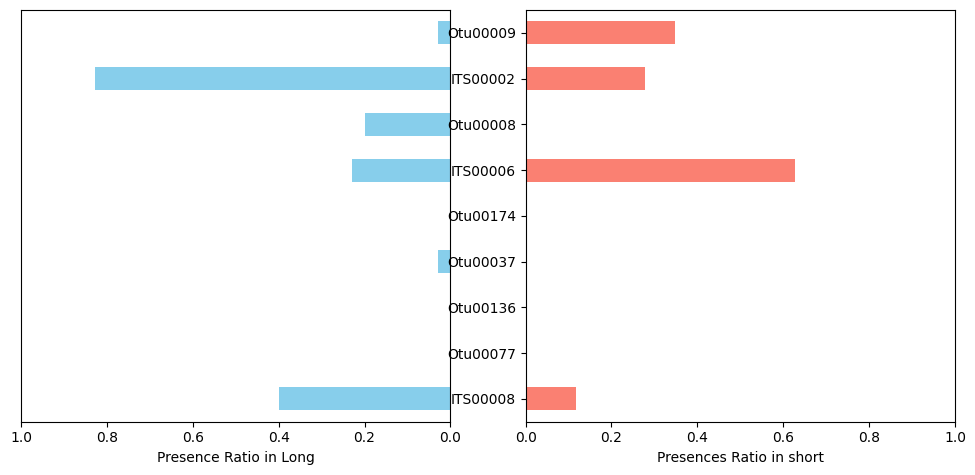

Analysis for order
Validation passed: Dimensions are correct.
Long= 35, short = 43
                OTU                presence_pos  presence_neg
0                   Clostridiales    0.600000      0.139535  
1                 Lactobacillales    0.228571      0.046512  
2                 o__Pleosporales    0.085714      0.441860  
3            o__Saccharomycetales    0.885714      0.488372  
4           o__unclassified_Fungi    0.000000      0.348837  
5                   Bacteroidales    0.114286      0.000000  
6               o__Rhizophydiales    0.000000      0.093023  
7           k__Fungi_unclassified    0.685714      0.953488  
8                 Selenomonadales    0.114286      0.000000  
9      p__Ascomycota_unclassified    0.000000      0.046512  
10           Bacilli_unclassified    0.200000      0.000000  
11                  o__Agaricales    0.142857      0.395349  
12  o__unclassified_Rozellomycota    0.028571      0.232558  
13                     Bacillales    0.514286    

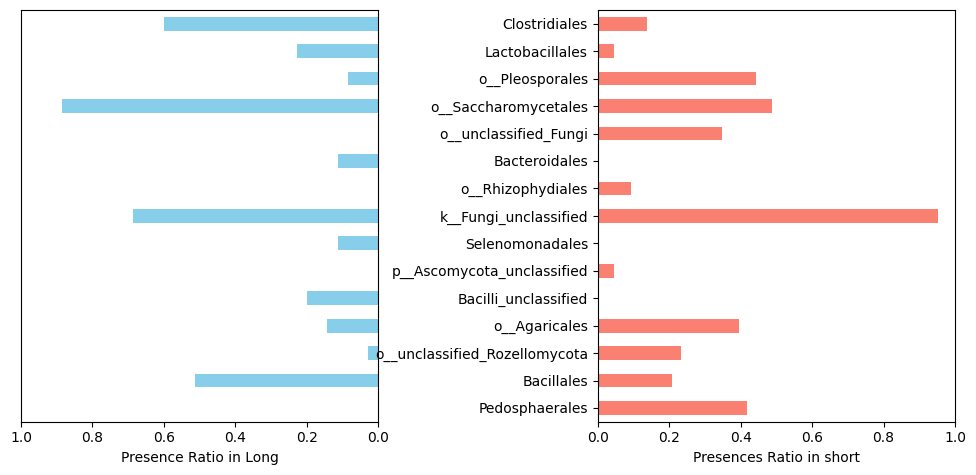

Validation passed: Dimensions are correct.
Long= 35, short = 43
                    OTU                    presence_pos  presence_neg
0                           Clostridiales    0.600000      0.139535  
1                    Bacilli_unclassified    0.200000      0.000000  
2                       Corynebacteriales    0.428571      0.162791  
3                         Selenomonadales    0.114286      0.000000  
4                           Subgroup_5_or    0.000000      0.000000  
5                           Bacteroidales    0.114286      0.000000  
6                         Fusobacteriales    0.028571      0.000000  
7                                  PLTA13    0.000000      0.000000  
8                   Thermoanaerobaculales    0.000000      0.000000  
9                    o__Saccharomycetales    0.885714      0.488372  
10                      o__Mortierellales    0.771429      0.813953  
11                  k__Fungi_unclassified    0.685714      0.953488  
12          o__unclassifie

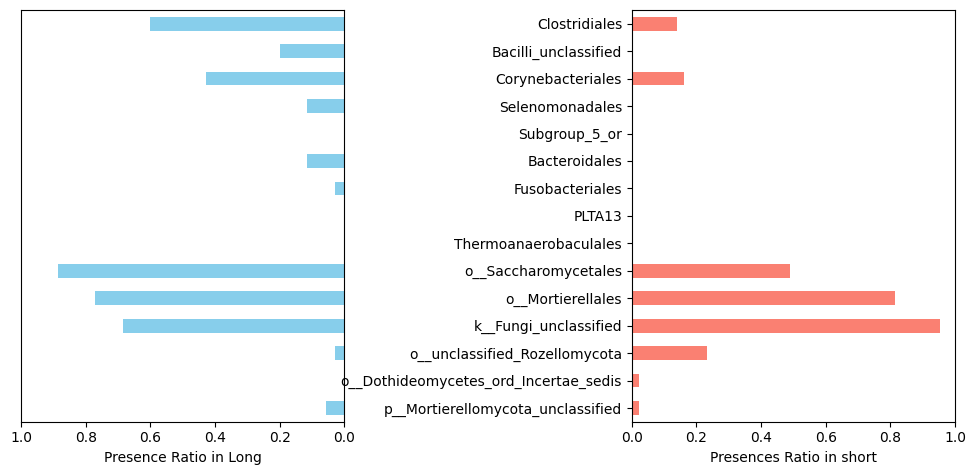

Validation passed: Dimensions are correct.
Long= 35, short = 43
                OTU                presence_pos  presence_neg
0                   Clostridiales    0.600000      0.139535  
1                 o__Pleosporales    0.085714      0.441860  
2            o__Saccharomycetales    0.885714      0.488372  
3           o__unclassified_Fungi    0.000000      0.348837  
4                   Bacteroidales    0.114286      0.000000  
5                 Selenomonadales    0.114286      0.000000  
6      p__Ascomycota_unclassified    0.000000      0.046512  
7            Bacilli_unclassified    0.200000      0.000000  
8   o__unclassified_Rozellomycota    0.028571      0.232558  
9           Thermoanaerobaculales    0.000000      0.000000  
10                 o__Capnodiales    0.000000      0.069767  
11  p__Basidiomycota_unclassified    0.000000      0.093023  
12                        o__GS08    0.000000      0.093023  
13                  o__Orbiliales    0.000000      0.000000  
14    

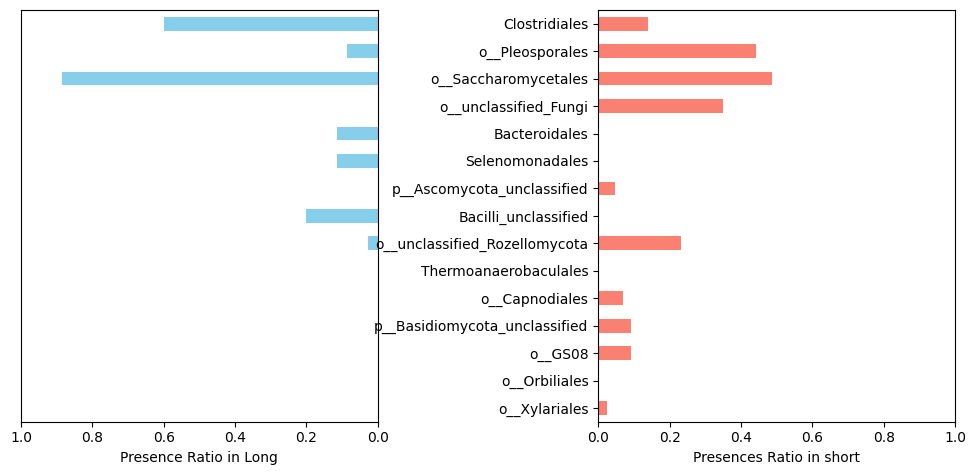

Analysis for class
Validation passed: Dimensions are correct.
Long= 35, short = 43
                 OTU                 presence_pos  presence_neg
0                        Clostridia    0.600000      0.139535  
1                c__Dothideomycetes    0.142857      0.720930  
2                c__Saccharomycetes    0.885714      0.488372  
3             c__unclassified_Fungi    0.000000      0.348837  
4                           Bacilli    0.685714      0.279070  
5                 c__Agaricomycetes    0.257143      0.790698  
6             c__Rhizophydiomycetes    0.000000      0.093023  
7             k__Fungi_unclassified    0.685714      0.953488  
8                     Negativicutes    0.114286      0.000000  
9        p__Ascomycota_unclassified    0.000000      0.046512  
10                c__Glomeromycetes    0.000000      0.093023  
11    c__unclassified_Rozellomycota    0.028571      0.232558  
12                       Subgroup_6    0.885714      0.976744  
13  p__Chytridiomycot

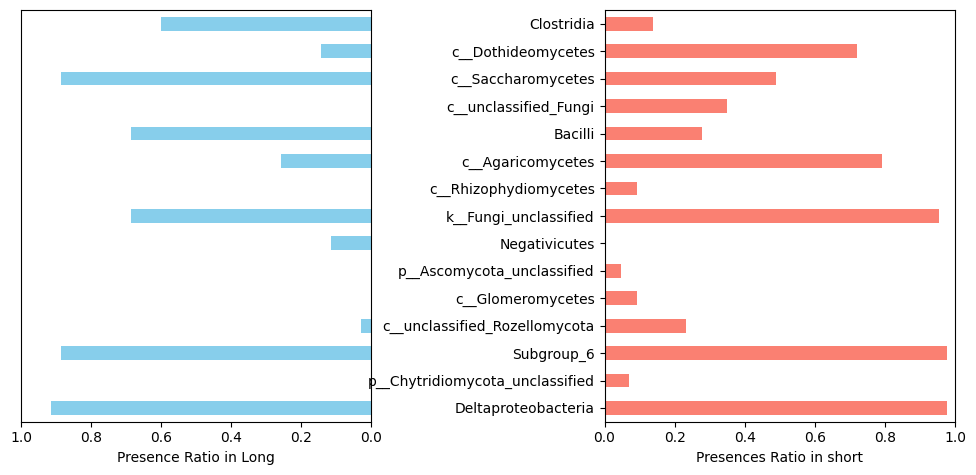

Validation passed: Dimensions are correct.
Long= 35, short = 43
                    OTU                    presence_pos  presence_neg
0                              Clostridia    0.600000      0.139535  
1                     Alphaproteobacteria    1.000000      1.000000  
2                                 Bacilli    0.685714      0.279070  
3                           Negativicutes    0.114286      0.000000  
4                           Fusobacteriia    0.028571      0.000000  
5                     Thermoanaerobaculia    0.000000      0.000000  
6                      c__Saccharomycetes    0.885714      0.488372  
7                      c__Tremellomycetes    0.771429      0.604651  
8                   c__Mortierellomycetes    0.771429      0.813953  
9                   k__Fungi_unclassified    0.685714      0.953488  
10  c__Rozellomycotina_cls_Incertae_sedis    0.057143      0.348837  
11          c__unclassified_Rozellomycota    0.028571      0.232558  
12                     c__

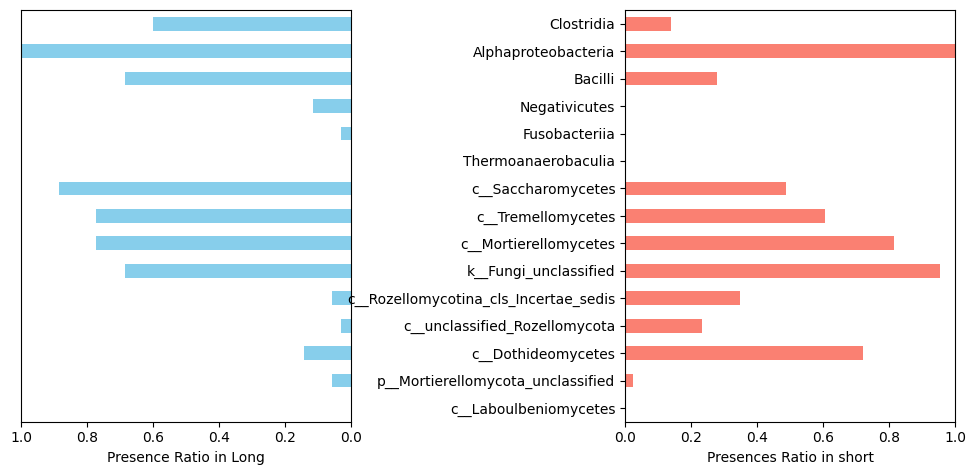

Validation passed: Dimensions are correct.
Long= 35, short = 43
                    OTU                    presence_pos  presence_neg
0                              Clostridia    0.600000      0.139535  
1                      c__Dothideomycetes    0.142857      0.720930  
2                      c__Saccharomycetes    0.885714      0.488372  
3                   c__unclassified_Fungi    0.000000      0.348837  
4                                 Bacilli    0.685714      0.279070  
5                           Negativicutes    0.114286      0.000000  
6              p__Ascomycota_unclassified    0.000000      0.046512  
7           c__unclassified_Rozellomycota    0.028571      0.232558  
8                     Thermoanaerobaculia    0.000000      0.000000  
9   c__Rozellomycotina_cls_Incertae_sedis    0.057143      0.348837  
10                      c__Orbiliomycetes    0.000000      0.000000  
11                  c__Laboulbeniomycetes    0.000000      0.000000  
12                        

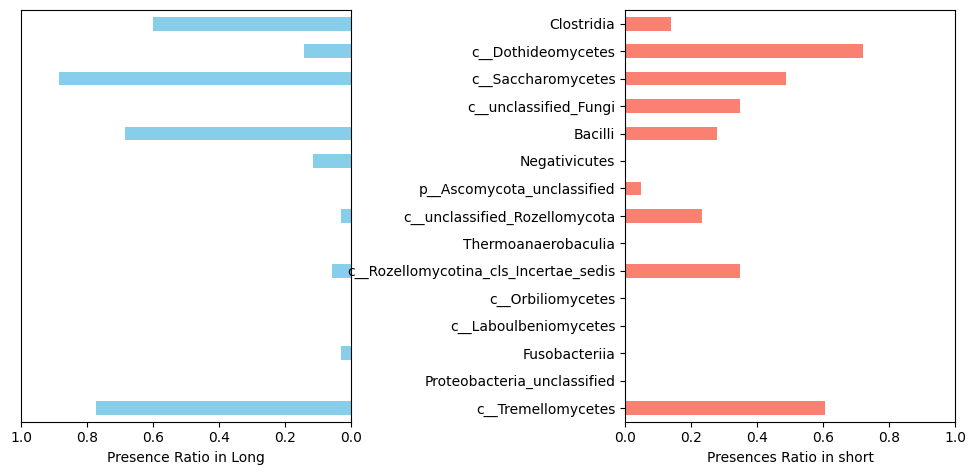

Analysis for phylum
Validation passed: Dimensions are correct.
Long= 35, short = 43
            OTU            presence_pos  presence_neg
0              Firmicutes    0.942857      0.418605  
1   p__unclassified_Fungi    0.000000      0.348837  
2      p__Chytridiomycota    0.000000      0.325581  
3        p__Glomeromycota    0.000000      0.162791  
4   k__Fungi_unclassified    0.685714      0.953488  
5           Acidobacteria    0.971429      1.000000  
6        p__Rozellomycota    0.171429      0.767442  
7   Bacteria_unclassified    0.000000      0.023256  
8             Nitrospirae    0.000000      0.000000  
9         Latescibacteria    0.000000      0.046512  
10          p__Ascomycota    1.000000      1.000000  
11        Verrucomicrobia    0.914286      0.976744  
12       Gemmatimonadetes    0.057143      0.232558  
13           Fusobacteria    0.028571      0.000000  
14        Armatimonadetes    0.000000      0.000000  


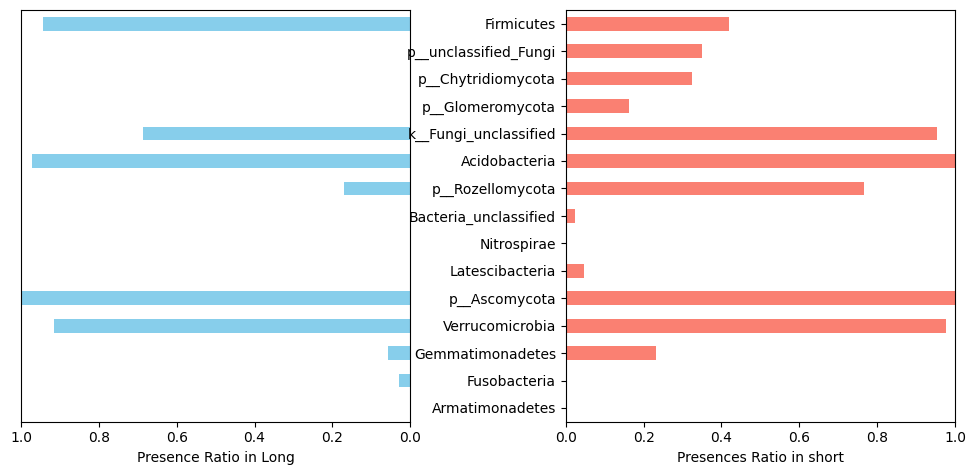

Validation passed: Dimensions are correct.
Long= 35, short = 43
           OTU            presence_pos  presence_neg
0          Acidobacteria    0.971429      1.000000  
1             Firmicutes    0.942857      0.418605  
2            Nitrospirae    0.000000      0.000000  
3           Fusobacteria    0.028571      0.000000  
4   p__Mortierellomycota    0.828571      0.813953  
5       p__Rozellomycota    0.171429      0.767442  
6     p__Chytridiomycota    0.000000      0.325581  
7  p__unclassified_Fungi    0.000000      0.348837  


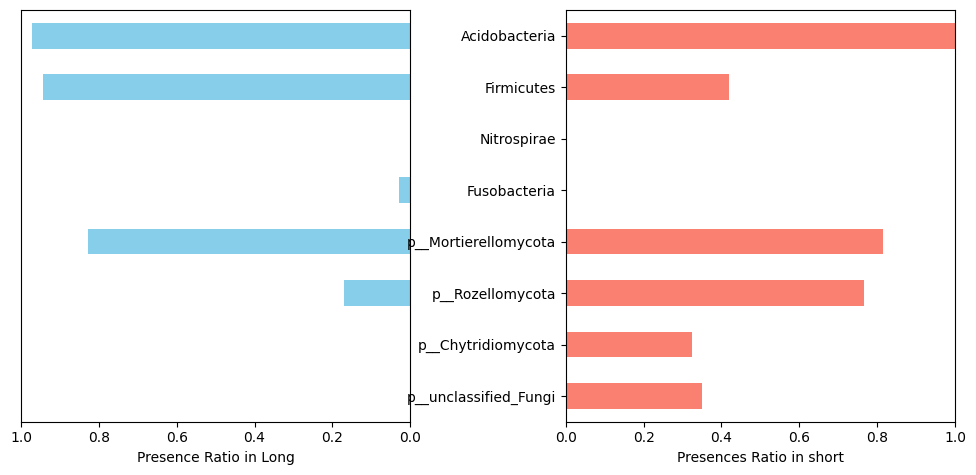

Validation passed: Dimensions are correct.
Long= 35, short = 43
           OTU            presence_pos  presence_neg
0             Firmicutes    0.942857      0.418605  
1  p__unclassified_Fungi    0.000000      0.348837  
2     p__Chytridiomycota    0.000000      0.325581  
3          Acidobacteria    0.971429      1.000000  
4       p__Rozellomycota    0.171429      0.767442  
5            Nitrospirae    0.000000      0.000000  
6           Fusobacteria    0.028571      0.000000  
7   p__Mortierellomycota    0.828571      0.813953  


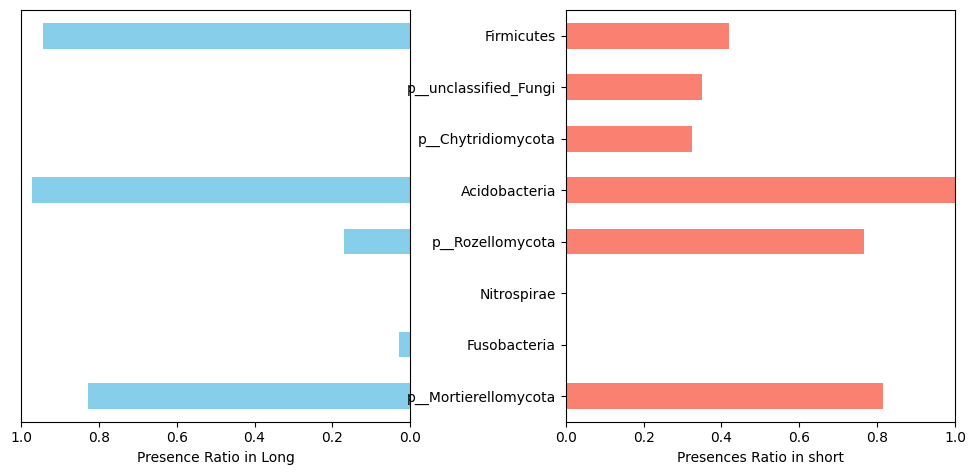

In [22]:
entries=15

for i, data0 in enumerate(data_4taxa):
    print(f"Analysis for {taxlabels[i]}")
    X_FS_15= X_FS_4taxa[i][:,:entries]
    selectedOTU_index_15=selectedOTU_index_4tax[i][:entries]
    selectedASVs_15 = col_names_4taxa[i][selectedOTU_index_15]
    FS.plotPresenseRatio(X_FS_15,targetLabel,selectedASVs_15,posLabel="LONG",posText="Long",negText="short")
    #FS.OTUviolin(X_FS_15,targetLabel,selectedASVs_15,y_max=0.3)

    M1 = min(entries,X_lasso_4taxa[i].shape[1])
    selectedLasso_index_15=xind_lasso_4taxa[i][:M1] # select the first M features, no ranking
    selectedlasso_15 = col_names_4taxa[i][selectedLasso_index_15]
    X_lasso_15 = data0[:,selectedLasso_index_15]
    FS.plotPresenseRatio(X_lasso_15,targetLabel,selectedlasso_15,posLabel="LONG",posText="Long",negText="short")
    #FS.OTUviolin(X_lasso_4taxa_15,targetLabel,selectedlasso_15,y_max=0.3)
    
    M2 = min(entries,X_FS_lasso_4taxa[i].shape[1])
    FS_Lasso_index_15=xind_FS_lasso_4taxa[i][:M2] # select the first M features, no ranking
    FS_lasso_15 = col_names_4taxa[i][FS_Lasso_index_15]
    X_FS_lasso_15 = data0[:,FS_Lasso_index_15]
    FS.plotPresenseRatio(X_FS_lasso_15,targetLabel,FS_lasso_15,posLabel="LONG",posText="Long",negText="short")
   

### Fisher_discriminant_ratio

The Fisher Discriminant Ratio is a measure used in statistics and machine learning to evaluate the separability between two or more classes. It is commonly used in Linear Discriminant Analysis (LDA) to reduce dimensionality while preserving as much of the class discriminatory information as possible.

Fisher's Criterion / Fisher's Discriminant Ratio
Fisher's discriminant ratio evaluates how well the classes can be separated based on the ratio of the between-class scatter matrix to the within-class scatter matrix.

In [ ]:
for i in range(len(taxlabels)):
    print(f"Analysis of {taxlabels[i]}")
    for datatype, subset in data_subset_4taxa[i].items():
        print(f"f1 of {datatype} = {metric.fisher_discriminant_ratio(subset,targetLabel)}")
    for datatype, subset in data_FS_lasso_4taxa[i].items():
        print(f"f1 of {datatype} = {metric.fisher_discriminant_ratio(subset,targetLabel)}")


Analysis of OTU


### compare the first 15 index by their present ratio